<center><h1>Online Shoppers Intention Prediction</h1></center> 

###  Sources: 
http://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset
https://github.com/zeglam/Online-shoppers-intention-prediction/blob/master/LICENSE
        
### Data Description: 
The dataset consists of feature vectors belonging to 12,330 sessions. The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period. Of the 12,330 sessions in the dataset, 84.5% (10,422) were negative class samples that did not end with shopping, and the rest (1908) were positive class samples ending with shopping.

#### Numerical features
| Feature name | Feature description                                                 | Min. val | Max. val | SD     |
|:-------------|:--------------------------------------------------------------------|:---------|:---------|:-------|
| Admin.       | #pages visited by the visitor about account management              | 0        | 27       | 3.32   |
| Ad. duration | #seconds spent by the visitor on account management related pages	 | 0        | 3398     | 176.70 |
| Info.        | #informational pages visited by the visitor                         | 0        | 24       | 1.26   |
| Info. durat. | #seconds spent by the visitor on informational pages	             | 0        | 2549     | 140.64 |
| Prod.        | #pages visited by visitor about product related pages	             | 0        | 705      | 44.45  |
| Prod.durat.  | #seconds spent by the visitor on product related pages	             | 0        | 63,973   | 1912.3 |
| Bounce rate  | Average bounce rate value of the pages visited by the visitor	     | 0        | 0.2      | 0.04   |
| Exit rate	   | Average exit rate value of the pages visited by the visitor         | 0        | 0.2      | 0.05   |
| Page value   | Average page value of the pages visited by the visitor	             | 0        | 361      | 18.55  |
| Special day  | Closeness of the site visiting time to a special day	             | 0        | 1.0      | 0.19   |

#### Categorical features
| Feature name        | Feature description                                                      | Number of Values |
|:--------------------|:-------------------------------------------------------------------------|:-----------------|
| OperatingSystems    | Operating system of the visitor                                          | 8                |
| Browser             | Browser of the visitor                                                   | 13               |
| Region              | Geographic region from which the session has been started by the visitor | 9                |
| TrafficType         | Traffic source (e.g., banner, SMS, direct)                               | 20               |
| VisitorType         | Visitor type as “New Visitor,” “Returning Visitor,” and “Other”	         | 3                |
| Weekend             | Boolean value indicating whether the date of the visit is weekend        | 2                |
| Month               | Month value of the visit date                                            | 12               |
| Revenue             | Class label: whether the visit has been finalized with a transaction     | 2                |

### Project Goal
The main goal of this project is to design a machine learning classification system, that is able to predict an online shopper's intention ( _buy_ or _no_ _buy_ ), based on the values of the given features. 

We will try a number of different classification algorithms, and compare their performance, in order to pick the best one for the project.

### Libraries Import

In [1]:
import numpy as np
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

### Data Import

In [2]:
df = pd.read_csv("../data/online_shoppers_intention.csv")

### Data Description

#### Data Header

In [3]:
df.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False


#### Data Types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Here we can see that most of our dataset is numerical, either integers or floats; *Revenue* and *Weekend* are boolean type, and they can easly be transformed into binary type (0 & 1). 

#### Statistical Analysis of Our Dataset

In [5]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


### Data Cleaning

#### Missing Data Points

In [6]:
print(df.isnull().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


It looks like our dataset has no missing values at all, which is great.

#### Data Type Fix

We will transform *Revenue* & *Weekend* features from *boolean* into *binary*, so that we can easily use them in our later calculations. 

In [7]:
df.Revenue = df.Revenue.astype('int')
df.Weekend = df.Weekend.astype('int')

Now, let's check dataset info: 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Both *Revenue* and *Weekend* has been transformed into binary (0's and 1's). 

### EDA

#### Correlation Analysis

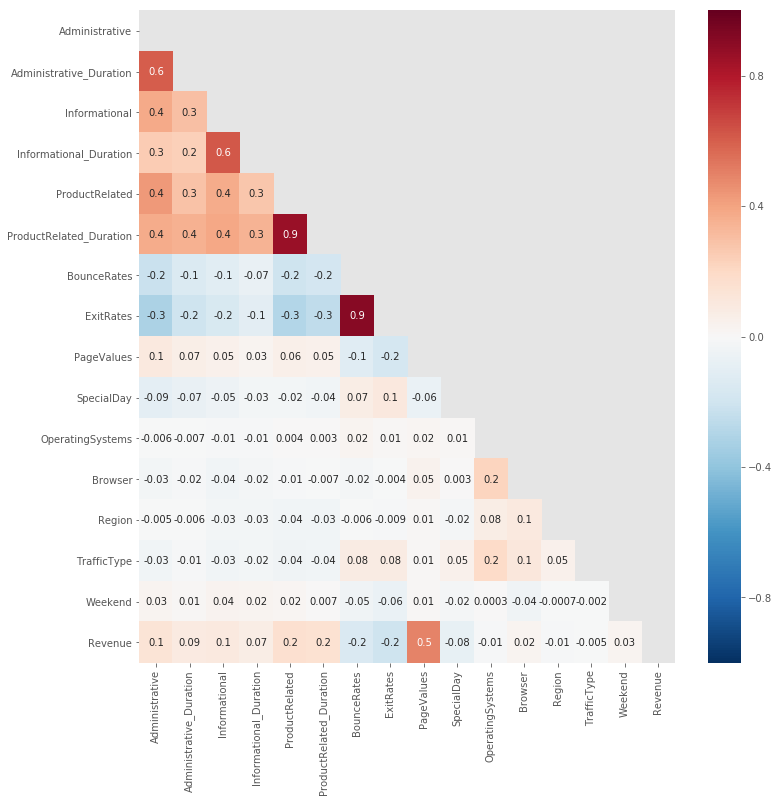

In [9]:
matrix = np.triu(df.corr())
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, ax=ax, fmt='.1g', vmin=-1, vmax=1, center= 0, mask=matrix, cmap='RdBu_r')
plt.show()

From the above heatmap, we observe the following: 
- In general, there is very little correlation among the different features in our dataset. 
- The very few cases of high correlation (|corr| >= 0.7) are: 
    - BounceRates & ExitRates (0.9). 
    - ProductRelated & ProductRelated_Duration (0.9).
- Moderate Correlations (0.3 < |corr| < 0.7): 
    - Among the following features: Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, and ProductRelated_Duration. 
    - Also between PageValues and Revenue. 

let's now show correlation among a few of our features

/Users/manguito/.virtualenvs/myEnv/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/manguito/.virtualenvs/myEnv/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/manguito/.virtualenvs/myEnv/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


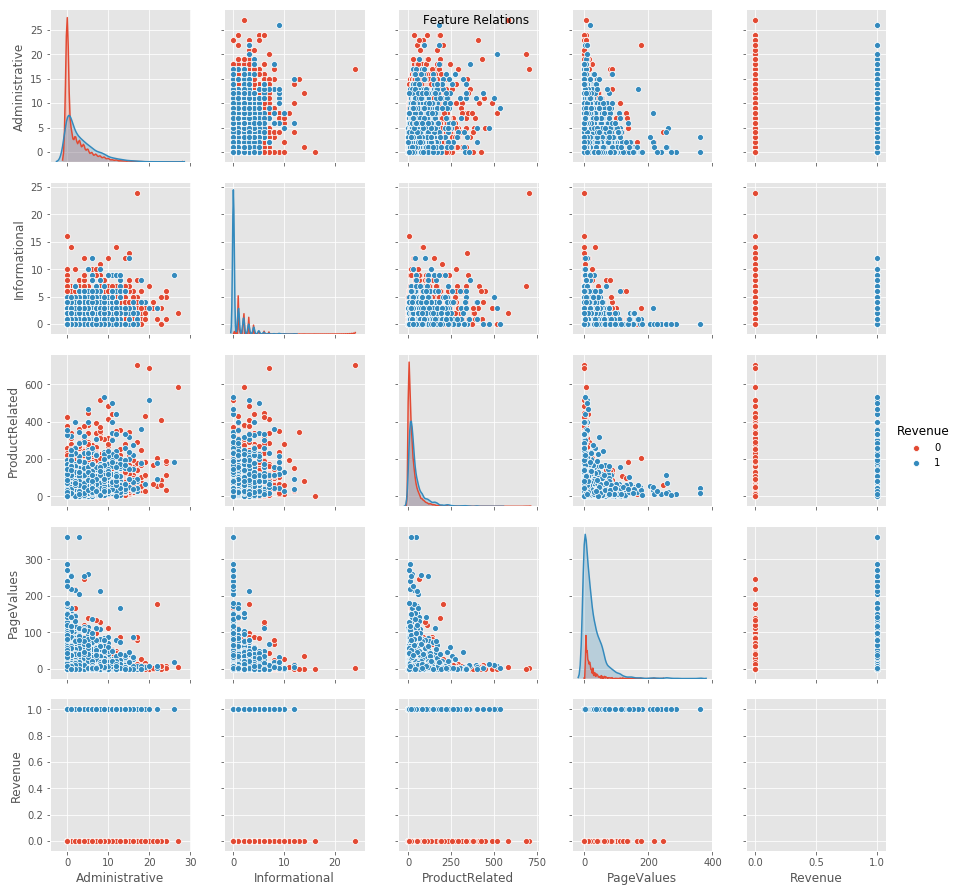

In [10]:
g1 = sns.pairplot(df[['Administrative', 'Informational', 'ProductRelated', 'PageValues', 'Revenue']], hue='Revenue')
g1.fig.suptitle('Feature Relations')
plt.show()

From the above figure, we can see: 
- No strong correlation between *Revenue* (our target) and any other feature. 
- A strong negative correlation between *PageValues* and other features shown. 

#### Web Pages Analysis

/Users/manguito/.virtualenvs/myEnv/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


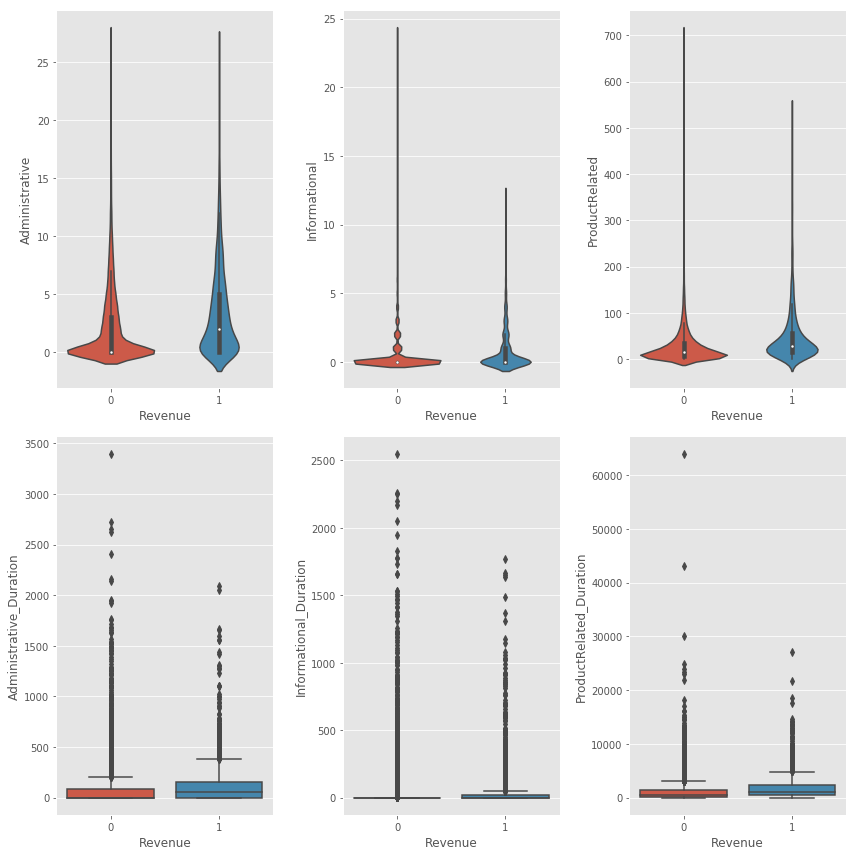

In [11]:
fig = plt.figure(figsize=(12, 12))

ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)

sns.violinplot(data=df, x = 'Revenue', y = 'Administrative', ax=ax1)
sns.violinplot(data=df, x = 'Revenue', y = 'Informational', ax=ax2)
sns.violinplot(data=df, x = 'Revenue', y = 'ProductRelated', ax=ax3)
sns.boxplot(data=df, x = 'Revenue', y = 'Administrative_Duration', ax=ax4)
sns.boxplot(data=df, x = 'Revenue', y = 'Informational_Duration', ax=ax5)
sns.boxplot(data=df, x = 'Revenue', y = 'ProductRelated_Duration', ax=ax6)

plt.tight_layout()
plt.show()

From the above boxplots, we can see that:
- In general, visitors tend to visit less pages, and spend less time, if they are not going to make a purchase. 
- The number of product related pages, and the time spent on them, is way higher than that for account related or informational pages.
- The first 3 feature look like they follow a skewed normal distribution. 

#### Page Metrics Analysis

/Users/manguito/.virtualenvs/myEnv/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


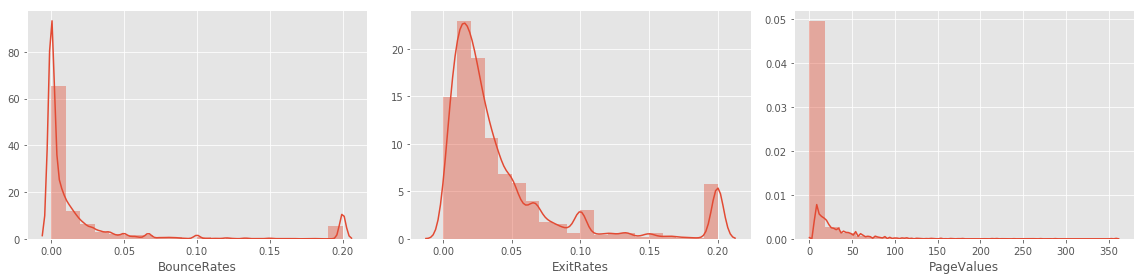

In [12]:
fig = plt.figure(figsize=(16, 4))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

sns.distplot(df['BounceRates'], bins=20, ax=ax1)
sns.distplot(df['ExitRates'], bins=20, ax=ax2)
sns.distplot(df['PageValues'], bins=20, ax=ax3)

plt.tight_layout()
plt.show()

From the above visualizations of 3 google analytics metrics, we can conclude: 
- *BounceRates* & *PageValues* do not follow a normal distribution. 
- All 3 features have distributions that are skewed right. 
- All 3 distributions have a lot of outliers. 
- The average bounce and exit rates of most of our data points is low, which is good, since high rates identicate that visitors are not engaging with the website. 
- Exit rate has more high values than bounce rate, which makes sense, where transaction confirmation pages for example will cause the average exit rate to increase. 
- Bounce rate ==> the percentage where the first page visited was the only page visited in that session. 
- Exit rate of a page ==> The percentage where that page was the last page visited in the session, out of all visits to that page. 

#### Visitor Analysis

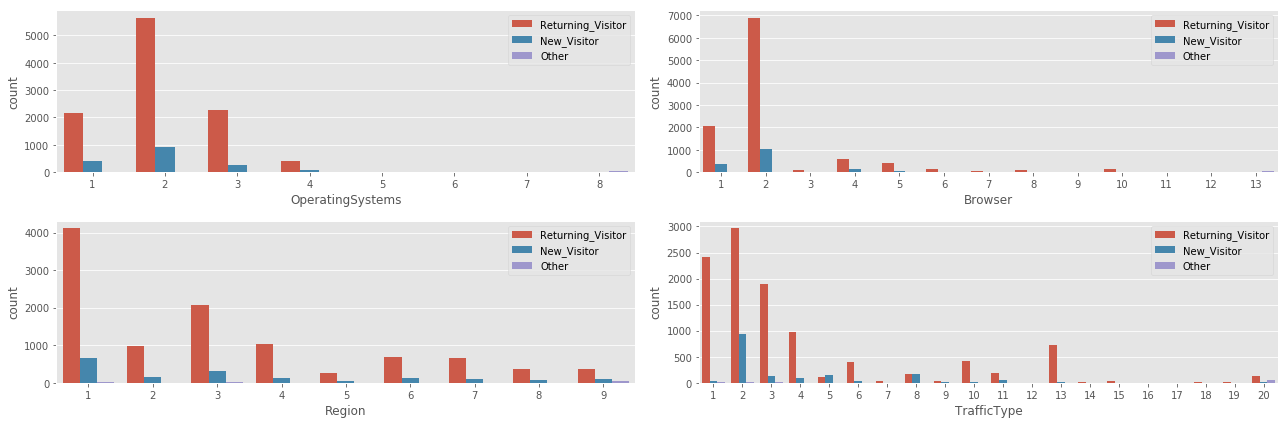

In [13]:
fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

sns.countplot(data=df, x='OperatingSystems', hue='VisitorType', ax=ax1)
sns.countplot(data=df, x='Browser', hue='VisitorType', ax=ax2)
sns.countplot(data=df, x='Region', hue='VisitorType', ax=ax3)
sns.countplot(data=df, x='TrafficType', hue='VisitorType', ax=ax4)

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')
ax4.legend(loc='upper right')
plt.tight_layout()
plt.show()

- 1 Operating system is responsible for ~7000 of the examples in our dataset. 
- 4 of the 8 operating systems used, are responsible of a very small number (<200) of the examples in our dataset. 
- A similar story repeated with the browsers used by visitors, where there is 1 dominant browser, 3 with decent representation in the dataset, and the rest are rarey used. 
- It looks like we have a very regionally diverse traffic in our dataset. 
- Also Traffic sources are very diverse, with a few that did not contribute much to the dataset. 

#### Visit Date Analysis

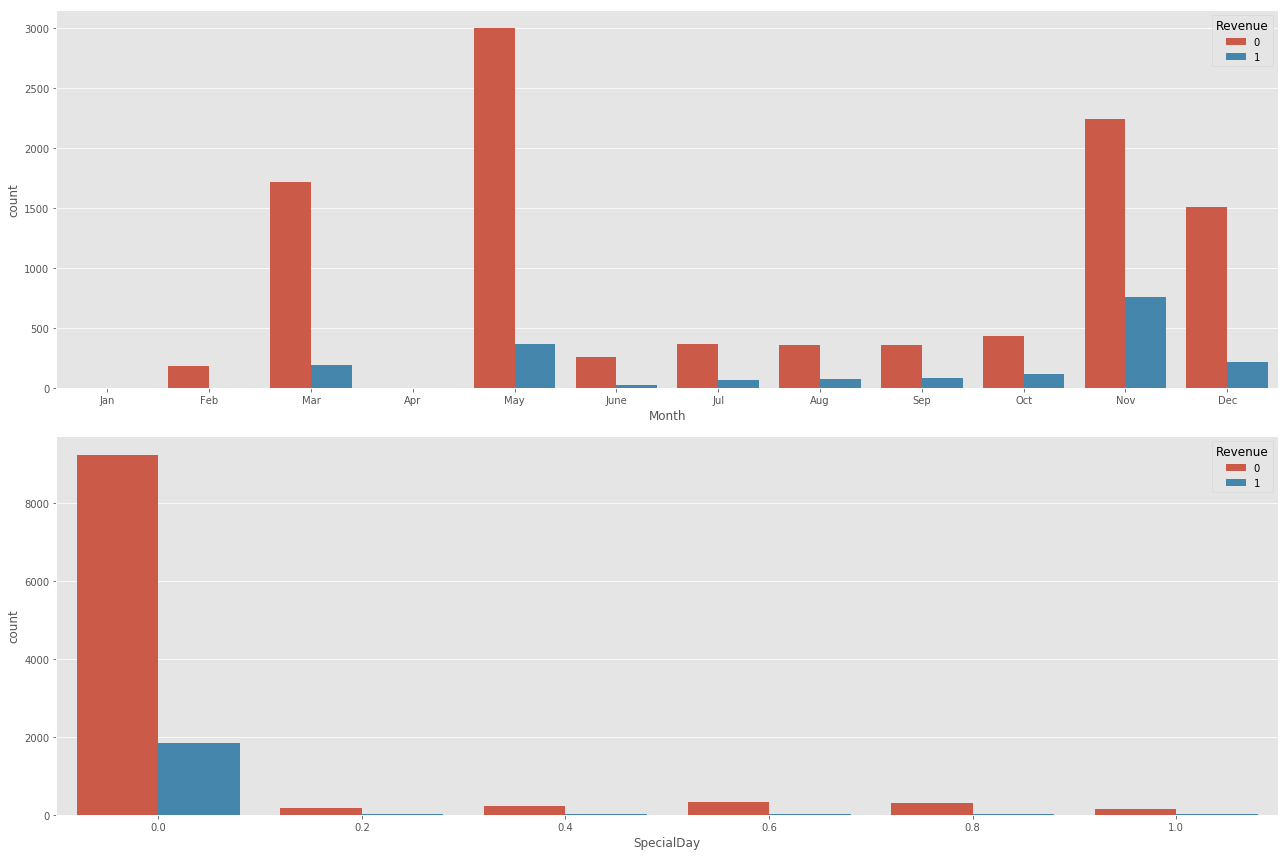

In [14]:
fig = plt.figure(figsize=(18, 12))

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

orderlist = ['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']
sns.countplot(data=df, x='Month', hue='Revenue', ax=ax1, order=orderlist)
sns.countplot(data=df, x='SpecialDay', hue='Revenue', ax=ax2)

plt.tight_layout()
plt.show()

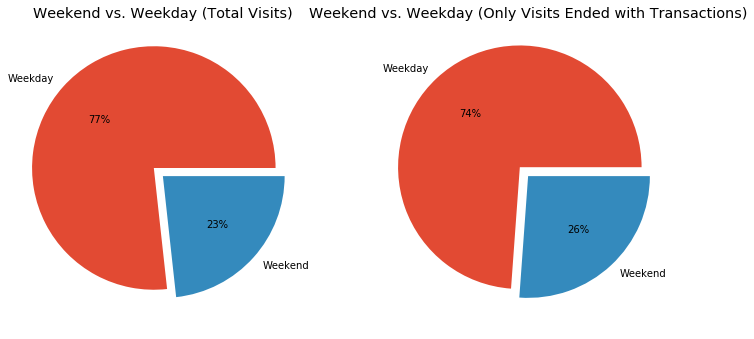

In [15]:
fig, ax = plt.subplots(1, 2,figsize=(12, 6), subplot_kw=dict(aspect="equal"))
ax[0].pie(df['Weekend'].value_counts(),explode=(0.1,0),labels=['Weekday','Weekend'], autopct='%1.0f%%')
ax[0].set_title('Weekend vs. Weekday (Total Visits)')
ax[1].pie(df[df['Revenue'] == 1]['Weekend'].value_counts(),explode=(0.1,0),labels=['Weekday','Weekend'], autopct='%1.0f%%')
ax[1].set_title('Weekend vs. Weekday (Only Visits Ended with Transactions)')
#fig.suptitle('Weekend Visits')
plt.show()

- On March and May, we have a lot of visits (May is the month with the highest number of visits), yet transactions made during those 2 months are not on the same level. 
- We have no visits at all during Jan nor Apr.
- Most transactions happen during the end of the year, with Nov as the month with the highest number of confirmed transactions. 
- The closer the visit date to a special day (like black Friday, new year's, ... etc) the more likely it will end up in a transaction. 
- Most of transactions happen on special days (SpecialDay =0). 
- It does not look like weekends affect the number of visits or transactions much, we can see only a slight increase in the number of transactions happening on weekends compared to those on weekdays. 

### Data Pre-Processing

In this section we will make our data ready for model training. This will include:

- Transform *Month* and *VisitorType* columns into numerical (binary) values.
- Split data set into training, validation, and testing parts (70/15/15), while separating *Revenue* column, where it will be used as our labels.
- We will ably feature scaling on our input data, in order to be used for Naive Bayes and SVM model training.

#### Data Transformation

In [16]:
dff = pd.concat([df,pd.get_dummies(df['Month'], prefix='Month')], axis=1).drop(['Month'],axis=1)
dff = pd.concat([dff,pd.get_dummies(dff['VisitorType'], prefix='VisitorType')], axis=1).drop(['VisitorType'],axis=1)
print(dff.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  OperatingSystems               12330 non-null  int64  
 11  Browser                        12330 non-null  int64  
 12  Region                         12330 non-null 

In [17]:
dff.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


#### Data Split

In [18]:
y = dff['Revenue']
X = dff.drop(['Revenue'], axis=1)

In [19]:
len(y)

12330

In [20]:
X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size=0.3, random_state=101)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5, random_state=101)

Now we have the following data subsets:
1. Train data (X_train) and trin labels (y_train) ==> 70%
2. Validation data (X_val) and validation labels (y_val) ==> 15%
3. Test data (X_test) and test labels (y)test) ==> 15%

#### Data Scaling

We will scale the features in our subsets, in order to use them to train, validate, and test models that will benefit from feature scaling.  

In [21]:
sc_X = StandardScaler()

Xsc_train = sc_X.fit_transform(X_train)
Xsc_val = sc_X.fit_transform(X_val)
Xsc_test = sc_X.fit_transform(X_test)

/Users/manguito/.virtualenvs/myEnv/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/manguito/.virtualenvs/myEnv/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/manguito/.virtualenvs/myEnv/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/manguito/.virtualenvs/myEnv/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/mangu

## Model Building

### Logistic Regression

In [22]:
lrm = LogisticRegression(C=1.0,solver='lbfgs',max_iter=10000) #default parameters
lrm.fit(X_train,y_train)
lrm_pred = lrm.predict(X_val)

print('Logistic Regression initial Performance:')
print('----------------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, lrm_pred))
print('F1 Score        : ', metrics.f1_score(y_val, lrm_pred))
print('Precision       : ', metrics.precision_score(y_val, lrm_pred))
print('Recall          : ', metrics.recall_score(y_val, lrm_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, lrm_pred))

Logistic Regression initial Performance:
----------------------------------------
Accuracy        :  0.8783126014061655
F1 Score        :  0.5243128964059196
Precision       :  0.7515151515151515
Recall          :  0.4025974025974026
Confusion Matrix:
  [[1500   41]
 [ 184  124]]


### K-fold Cross-Validation
https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py

In [23]:
from sklearn.model_selection import (TimeSeriesSplit, KFold, ShuffleSplit,
                                     StratifiedKFold, GroupShuffleSplit,
                                     GroupKFold, StratifiedShuffleSplit)
from matplotlib.patches import Patch
np.random.seed(1338)
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
n_splits = 4

Split data into train and test data

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
Xsc_train = sc_X.fit_transform(X_train)
Xsc_test = sc_X.fit_transform(X_test)

Xsc_train_df = pd.DataFrame(Xsc_train, index=X_train.index, columns=X_train.columns)
Xsc_test_df = pd.DataFrame(Xsc_test, index=X_test.index, columns=X_test.columns)




/Users/manguito/.virtualenvs/myEnv/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/manguito/.virtualenvs/myEnv/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/manguito/.virtualenvs/myEnv/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/manguito/.virtualenvs/myEnv/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [25]:
X_train.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
7821,6,105.633333,2,105.95,8,246.386508,0.000000,0.008929,0.000000,0.0,...,0,0,0,0,1,0,0,0,0,1
6701,0,0.000000,0,0.00,14,317.066667,0.035714,0.050000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
11312,1,21.250000,0,0.00,92,2716.519048,0.006738,0.037885,23.738911,0.0,...,0,0,0,0,1,0,0,0,0,1
3873,0,0.000000,0,0.00,7,203.666667,0.000000,0.009524,0.000000,0.0,...,0,0,0,1,0,0,0,0,0,1
9319,1,14.000000,0,0.00,50,1317.795833,0.010000,0.021470,0.000000,0.0,...,0,0,0,0,1,0,0,0,0,1


In [26]:
Xsc_train_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
7821,1.131955,0.156268,1.186984,0.530696,-0.536100,-0.517481,-0.458955,-0.704386,-0.309198,-0.307883,...,-0.192693,-0.152435,-0.426241,-0.614893,1.762410,-0.213717,-0.197492,-0.396978,-0.078604,0.407282
6701,-0.696588,-0.460087,-0.392550,-0.246800,-0.398929,-0.478028,0.279525,0.142770,-0.309198,-0.307883,...,-0.192693,-0.152435,-0.426241,-0.614893,-0.567405,-0.213717,-0.197492,-0.396978,-0.078604,0.407282
11312,-0.391831,-0.336096,-0.392550,-0.246800,1.384297,0.861314,-0.319639,-0.107113,0.951488,-0.307883,...,-0.192693,-0.152435,-0.426241,-0.614893,1.762410,-0.213717,-0.197492,-0.396978,-0.078604,0.407282
3873,-0.696588,-0.460087,-0.392550,-0.246800,-0.558962,-0.541327,-0.458955,-0.692108,-0.309198,-0.307883,...,-0.192693,-0.152435,-0.426241,1.626299,-0.567405,-0.213717,-0.197492,-0.396978,-0.078604,0.407282
9319,-0.391831,-0.378399,-0.392550,-0.246800,0.424098,0.080565,-0.252181,-0.445712,-0.309198,-0.307883,...,-0.192693,-0.152435,-0.426241,-0.614893,1.762410,-0.213717,-0.197492,-0.396978,-0.078604,0.407282


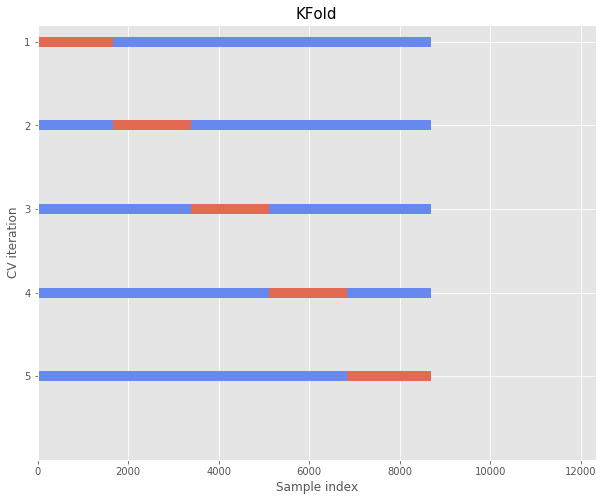

In [27]:
n_splits = 5


fig, ax = plt.subplots(figsize = (10,8))
cv = KFold(n_splits)
for ii, (tr, tt) in enumerate(cv.split(X=X_train, y=y_train)):
    # Fill in indices with the training/test groups
    indices = np.array([np.nan] * len(X))
    indices[tt] = 1
    indices[tr] = 0
    ax.scatter(range(len(indices)), [ii ] * len(indices),
                   c=indices, marker='_', lw=10, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)
    yticklabels = [i+1 for i in list(range(n_splits))]
    ax.set(yticks=np.arange(n_splits), yticklabels=yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits, -.2], xlim=[0, len(y)])
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)

#### Compare accuracy of logistic regression and KNN
Note that we need to use scaled variables for KNN

In [28]:
logStats = {}
knnStats = {}
for ii, (tr, tt) in enumerate(cv.split(X=X_train, y=y_train)):
    # Fill in indices with the training/test groups
    indices = np.array([np.nan] * len(X))
    indices[tt] = 1
    indices[tr] = 0
# train Logistic Regression Model
    lrm = LogisticRegression(C=1.0,solver='lbfgs',max_iter=10000) #default parameters
    lrm.fit(X_train.iloc[tr,:],y_train.iloc[tr])
    lrm_pred = lrm.predict(X_train.iloc[tt,:])
    y_val = y_train.iloc[tt]

    print('Logistic Regression initial Performance:')
    print('----------------------------------------')
    print('Accuracy        : ', metrics.accuracy_score(y_val, lrm_pred))
    print('F1 Score        : ', metrics.f1_score(y_val, lrm_pred))
    print('Precision       : ', metrics.precision_score(y_val, lrm_pred))
    print('Recall          : ', metrics.recall_score(y_val, lrm_pred))
    print('Confusion Matrix:\n ', confusion_matrix(y_val, lrm_pred))
    logStats.setdefault('accuracy', []).append(metrics.accuracy_score(y_val, lrm_pred))
    
    knn = KNeighborsClassifier(n_neighbors=5,weights='uniform',leaf_size=30,p=2) #default values
    knn.fit(Xsc_train_df.iloc[tr,:],y_train.iloc[tr])
    knn_pred = knn.predict(Xsc_train_df.iloc[tt,:])

    print('K-Nearest Neighbor Initial Performance:')
    print('---------------------------------------')
    print('Accuracy        : ', metrics.accuracy_score(y_val, knn_pred))
    print('F1 Score        : ', metrics.f1_score(y_val, knn_pred))
    print('Precision       : ', metrics.precision_score(y_val, knn_pred))
    print('Recall          : ', metrics.recall_score(y_val, knn_pred))
    print('Confusion Matrix:\n ', confusion_matrix(y_val, knn_pred))
    knnStats.setdefault('accuracy', []).append(metrics.accuracy_score(y_val, knn_pred))



Logistic Regression initial Performance:
----------------------------------------
Accuracy        :  0.8726114649681529
F1 Score        :  0.45544554455445546
Precision       :  0.773109243697479
Recall          :  0.32280701754385965
Confusion Matrix:
  [[1415   27]
 [ 193   92]]
K-Nearest Neighbor Initial Performance:
---------------------------------------
Accuracy        :  0.8581354950781702
F1 Score        :  0.40389294403892945
Precision       :  0.6587301587301587
Recall          :  0.2912280701754386
Confusion Matrix:
  [[1399   43]
 [ 202   83]]
Logistic Regression initial Performance:
----------------------------------------
Accuracy        :  0.8823870220162224
F1 Score        :  0.5012285012285012
Precision       :  0.7338129496402878
Recall          :  0.3805970149253731
Confusion Matrix:
  [[1421   37]
 [ 166  102]]
K-Nearest Neighbor Initial Performance:
---------------------------------------
Accuracy        :  0.8742757821552724
F1 Score        :  0.4668304668304668
P

In [29]:
np.mean(logStats['accuracy']),np.mean(knnStats['accuracy'])

(0.8818224088684857, 0.8707001001743826)